In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')
data_df.head(20)

,training_set,tot_ct,ex_ct,y,x
0,True,1588,66,-4.568430,ACGGUCCAU
1,True,1533,118,-3.683342,AUUGCCAGG
2,True,1459,399,-1.868565,ACAGCGGUA
3,True,1414,246,-2.516214,AACGCCAGG
4,True,1412,60,-4.535831,ACGGCUUGG
5,True,1412,11147,2.979870,AAGGUGGGA
6,True,1396,57,-4.582775,ACGGCUUAU
7,False,1384,14692,3.406907,CAGGUGGGA
8,False,1378,12990,3.236208,AAGGUUGGU
9,True,1336,43,-4.913873,UCAGUGGGA


<AxesSubplot:xlabel='y', ylabel='Count'>

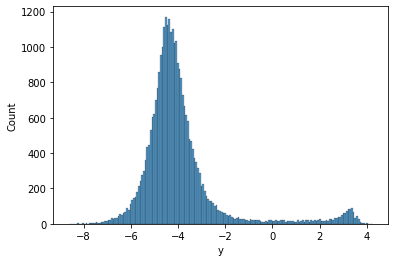

In [3]:
import seaborn as sns
sns.histplot(data_df['y'])

In [4]:
# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 24,411
testing N: 6,079


In [5]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='rna',
                     gpmap_type='pairwise',                     
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [6]:
# Set training data
model.set_data(x=train_df['x'],
               y=train_df['y'],
               shuffle=True)

N = 24,411 observations set as training data.
Data shuffled.
Time to set data: 0.391 sec.


In [7]:
# Fit model to data
history = model.fit(learning_rate=.0005,
                    epochs=1000,
                    batch_size=200,
                    early_stopping=True,
                    early_stopping_patience=30,
                    linear_initialization=False)

Epoch 1/1000
98/98 [==============================] - 1s 7ms/step - loss: 275.8075 - I_like: -0.5417 - val_loss: 260.8800 - val_I_like: -0.4528
Epoch 2/1000
98/98 [==============================] - 0s 4ms/step - loss: 255.5599 - I_like: -0.4000 - val_loss: 250.9135 - val_I_like: -0.3831
Epoch 3/1000
98/98 [==============================] - 0s 3ms/step - loss: 246.0195 - I_like: -0.3319 - val_loss: 241.5540 - val_I_like: -0.3176
Epoch 4/1000
98/98 [==============================] - 0s 3ms/step - loss: 236.6236 - I_like: -0.2668 - val_loss: 231.8390 - val_I_like: -0.2494
Epoch 5/1000
98/98 [==============================] - 0s 3ms/step - loss: 226.8205 - I_like: -0.1971 - val_loss: 221.7394 - val_I_like: -0.1781
Epoch 6/1000
98/98 [==============================] - 0s 3ms/step - loss: 217.7998 - I_like: -0.1349 - val_loss: 213.7673 - val_I_like: -0.1220
Epoch 7/1000
98/98 [==============================] - 0s 3ms/step - loss: 210.3482 - I_like: -0.0825 - val_loss: 206.9577 - val_I_like: 

98/98 [==============================] - 0s 3ms/step - loss: 160.5659 - I_like: 0.2678 - val_loss: 161.9576 - val_I_like: 0.2475
Epoch 59/1000
98/98 [==============================] - 0s 3ms/step - loss: 160.5075 - I_like: 0.2694 - val_loss: 161.7479 - val_I_like: 0.2488
Epoch 60/1000
98/98 [==============================] - 0s 3ms/step - loss: 160.4102 - I_like: 0.2700 - val_loss: 161.6902 - val_I_like: 0.2495
Epoch 61/1000
98/98 [==============================] - 0s 3ms/step - loss: 160.1872 - I_like: 0.2705 - val_loss: 161.5978 - val_I_like: 0.2502
Epoch 62/1000
98/98 [==============================] - 0s 3ms/step - loss: 160.2950 - I_like: 0.2726 - val_loss: 161.4400 - val_I_like: 0.2516
Epoch 63/1000
98/98 [==============================] - 0s 3ms/step - loss: 160.0753 - I_like: 0.2723 - val_loss: 161.4466 - val_I_like: 0.2513
Epoch 64/1000
98/98 [==============================] - 0s 3ms/step - loss: 159.8821 - I_like: 0.2745 - val_loss: 161.6939 - val_I_like: 0.2506
Epoch 65/1000

Epoch 116/1000
98/98 [==============================] - 0s 3ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 117/1000
98/98 [==============================] - 0s 4ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 118/1000
98/98 [==============================] - 0s 4ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 119/1000
98/98 [==============================] - 0s 3ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 120/1000
98/98 [==============================] - 0s 3ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 121/1000
98/98 [==============================] - 0s 4ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 122/1000
98/98 [==============================] - 0s 3ms/step - loss: nan - I_like: nan - val_loss: nan - val_I_like: nan
Epoch 123/1000
48/98 [=============>................] - ETA: 0s - loss: nan - I_like: nan

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
x = tf.constant(100.)
y = tf.constant(1.E20)
K.min([K.exp(x), y]) 

In [ ]:
# Save model
model.save('mpsa_ge_pairwise')

In [ ]:
# Load model
model = mavenn.load('mpsa_ge_pairwise')

In [ ]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

In [ ]:
# Show training history
print('On test data:')

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

In [ ]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

In [ ]:
# Plot pairwise parameters
theta = model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                        alphabet=theta['alphabet'],
                        ax=ax);

In [ ]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()